In [1]:
import pandas as pd
import numpy as np
import pickle
import shap
import matplotlib.pyplot as plt
from IPython.display import display
from ast import literal_eval
from comparers import ModelComparer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from baseline import dt_feature_importance, print_rules
from tasks.cluster_example import make_task
from diro2c_wrapper import CombinationClassifier, ConstantClassifier

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

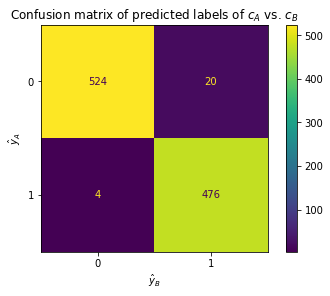

In [4]:
comparer.plot_confusion_matrix(X)

# General Explanations

In [5]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)

In [6]:
mclass_tree = DecisionTreeClassifier()
mclass_tree.fit(X, mclass_diff)
class_names = comparer.class_names[mclass_tree.classes_]

In [7]:
feature_importances = dt_feature_importance(mclass_tree)
feature_order = np.flip(np.argsort(feature_importances))

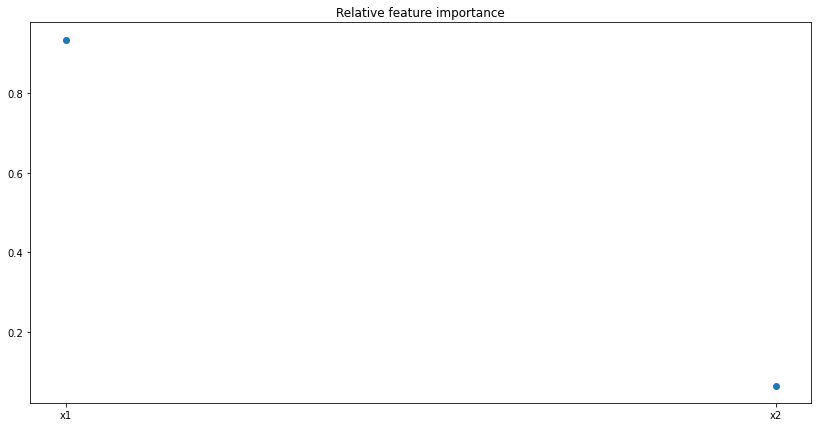

In [8]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

In [9]:
class_names

array(['(0, 0)', '(0, 1)', '(1, 0)', '(1, 1)'], dtype='<U6')

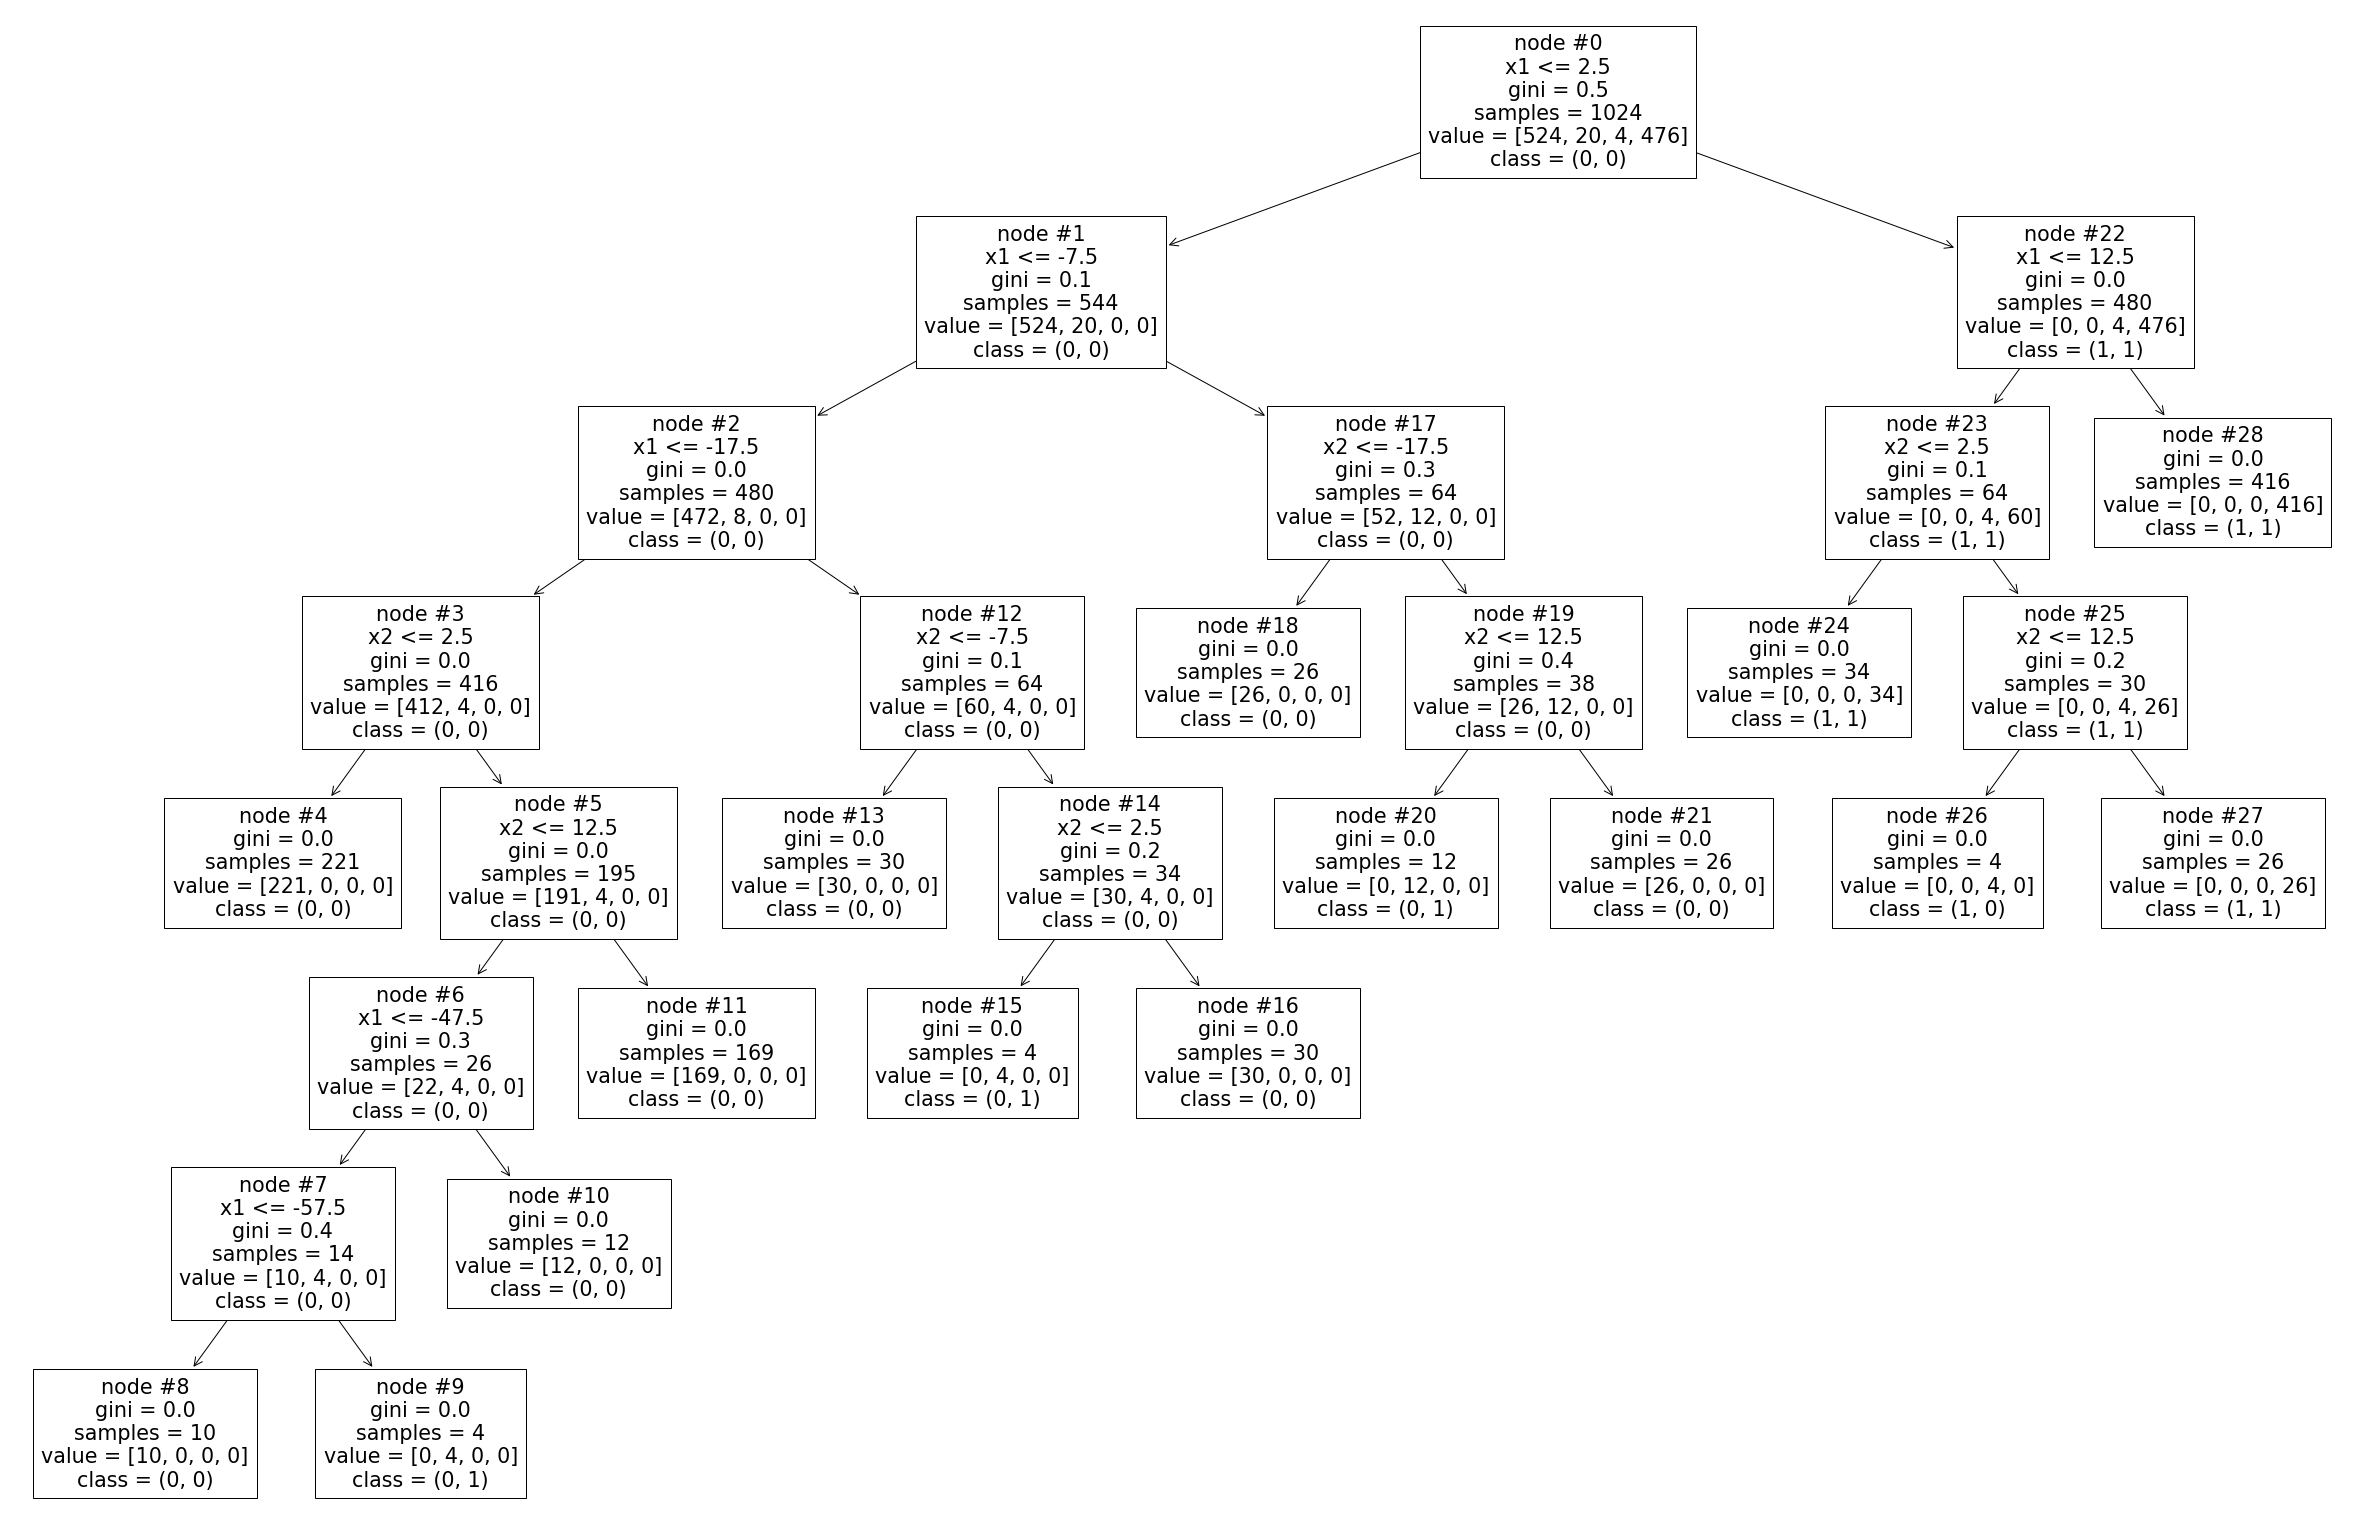

In [10]:
fig, ax = plt.subplots(figsize=(42, 28))
plot_tree(mclass_tree, feature_names=comparer.feature_names, class_names=class_names, ax=ax, precision=1, node_ids=True);

In [11]:
print_rules(mclass_tree, feature_names, class_names, '(0, 1)', feature_order, precision=2)

node #20: if (x1 > -7.5) and (x1 <= 2.5) and (x2 > -17.5) and (x2 <= 12.5) then class: (0, 1) (12/12 instances)
node #15: if (x1 > -17.5) and (x1 <= -7.5) and (x2 > -7.5) and (x2 <= 2.5) then class: (0, 1) (4/4 instances)
node #9: if (x1 > -57.5) and (x1 <= -47.5) and (x2 > 2.5) and (x2 <= 12.5) then class: (0, 1) (4/4 instances)


In [12]:
print_rules(mclass_tree, feature_names, class_names, '(1, 0)', feature_order, precision=2)

node #26: if (x1 > 2.5) and (x1 <= 12.5) and (x2 > 2.5) and (x2 <= 12.5) then class: (1, 0) (4/4 instances)
